# Manufacturing Sales Analytics & Forecasting

## 1. Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from statsmodels.tsa.holtwinters import ExponentialSmoothing

## 2. Load Sample Manufacturing Sales Dataset
We’ll simulate monthly sales for two products in a factory.  
In a real case, this would come from ERP, SQL, or CSV exports.  

**Business Relevance:**  
Data ingestion is the first step to enable visibility across operations.


In [2]:
dates = pd.date_range(start="2022-01-01", end="2024-12-01", freq="MS")
np.random.seed(42)

data = {
    "Month": dates,
    "Product_A_Sales": np.random.randint(80, 150, len(dates)) + np.arange(len(dates))*2,
    "Product_B_Sales": np.random.randint(50, 120, len(dates)) + np.arange(len(dates))
}

df = pd.DataFrame(data)
df.head()


,Month,Product_A_Sales,Product_B_Sales
0,2022-01-01,131,53
1,2022-02-01,96,110
2,2022-03-01,144,65
3,2022-04-01,106,61
4,2022-05-01,111,106


## 3. Data Cleaning & Preparation
- Check for mising values
- Ensure correct data types
- Create **Total Sales** column

**Business Relevance**

Clean data avoids misleading KPIs and ensures decision makers trust reports.

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 36 entries, 0 to 35
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Month            36 non-null     datetime64[ns]
 1   Product_A_Sales  36 non-null     int64         
 2   Product_B_Sales  36 non-null     int64         
dtypes: datetime64[ns](1), int64(2)
memory usage: 996.0 bytes


In [4]:
df.isnull().sum()

Month              0
Product_A_Sales    0
Product_B_Sales    0
dtype: int64

In [5]:
# Create the Total sales column
df['Total Sales'] = df['Product_A_Sales'] + df['Product_B_Sales']
df.head()

,Month,Product_A_Sales,Product_B_Sales,Total Sales
0,2022-01-01,131,53,184
1,2022-02-01,96,110,206
2,2022-03-01,144,65,209
3,2022-04-01,106,61,167
4,2022-05-01,111,106,217


## 4. Exploratory Data Analysis
We'll visualize:
- Sales trends
- Product comparison

**Business Insight**

Managers can identify seasonality, product growth, or declining demand.

C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


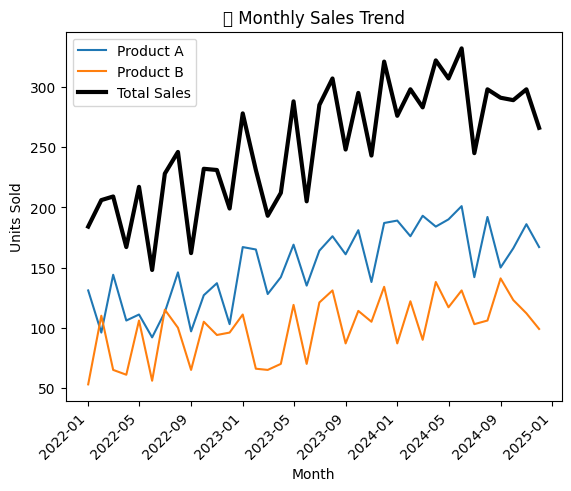

In [6]:
plt.Figure(figsize=(12,6))
plt.plot(df["Month"], df["Product_A_Sales"], label = "Product A")
plt.plot(df["Month"], df["Product_B_Sales"], label = "Product B")
plt.plot(df["Month"], df["Total Sales"], label = "Total Sales", linewidth = 3, color = "black")
plt.legend()
plt.title("📈 Monthly Sales Trend")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha="right")
plt.show()

#### ii) Highlight Total Sales with Area Fill
Emphasizes overall growth while keeping product breakdown

C:\Users\IDA\AppData\Local\Temp\ipykernel_24776\3045801095.py:15: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


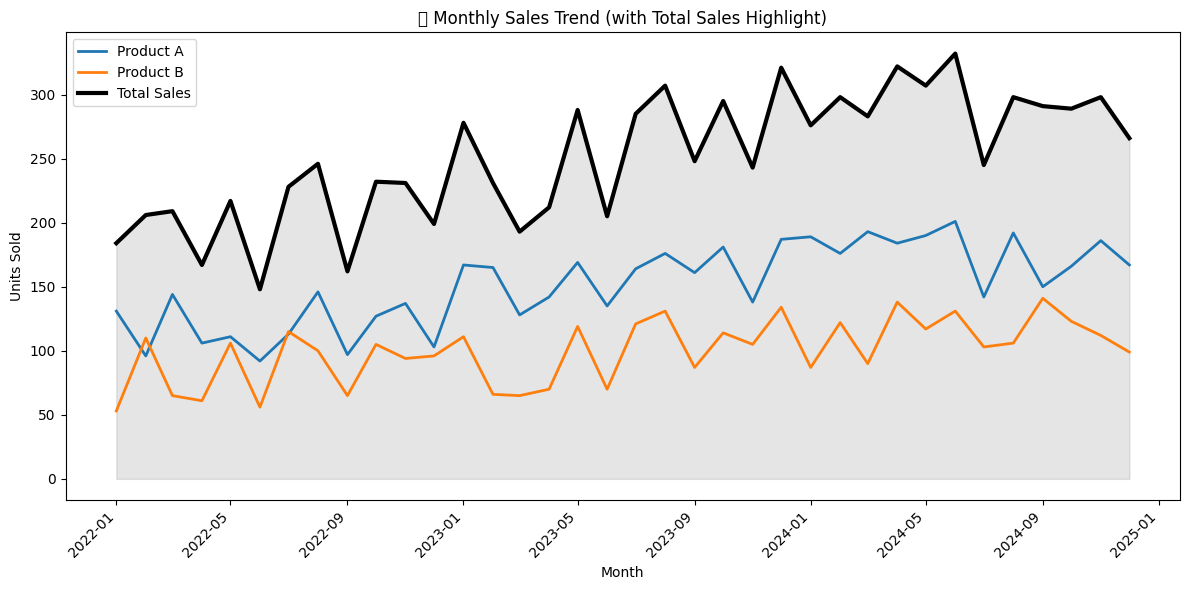

In [7]:
plt.figure(figsize=(12,6))

plt.plot(df["Month"], df["Product_A_Sales"], label="Product A", linewidth=2)
plt.plot(df["Month"], df["Product_B_Sales"], label="Product B", linewidth=2)

# Fill under Total Sales for emphasis
plt.plot(df["Month"], df["Total Sales"], label="Total Sales", linewidth=3, color="black")
plt.fill_between(df["Month"], df["Total Sales"], alpha=0.1, color="black")

plt.legend()
plt.title("📈 Monthly Sales Trend (with Total Sales Highlight)")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### iii) Stacked Area Chart
For showing how each product contributes to total sales:

C:\Users\IDA\AppData\Local\Temp\ipykernel_24776\3096227628.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


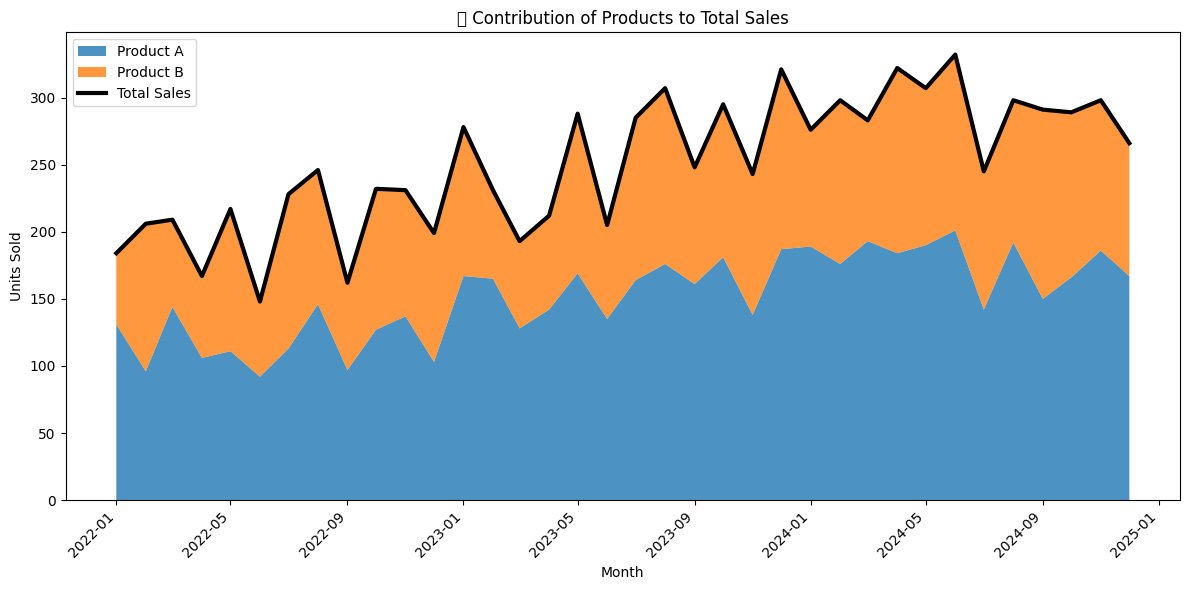

In [8]:
plt.figure(figsize=(12,6))

plt.stackplot(df["Month"], 
              df["Product_A_Sales"], 
              df["Product_B_Sales"], 
              labels=["Product A", "Product B"], alpha=0.8)

plt.plot(df["Month"], df["Total Sales"], label="Total Sales", color="black", linewidth=3)

plt.legend(loc="upper left")
plt.title("📊 Contribution of Products to Total Sales")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### iv) Side-by-side Bar Chart for Each Month
Makes comparisons between products easier

C:\Users\IDA\AppData\Local\Temp\ipykernel_24776\1929734772.py:15: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


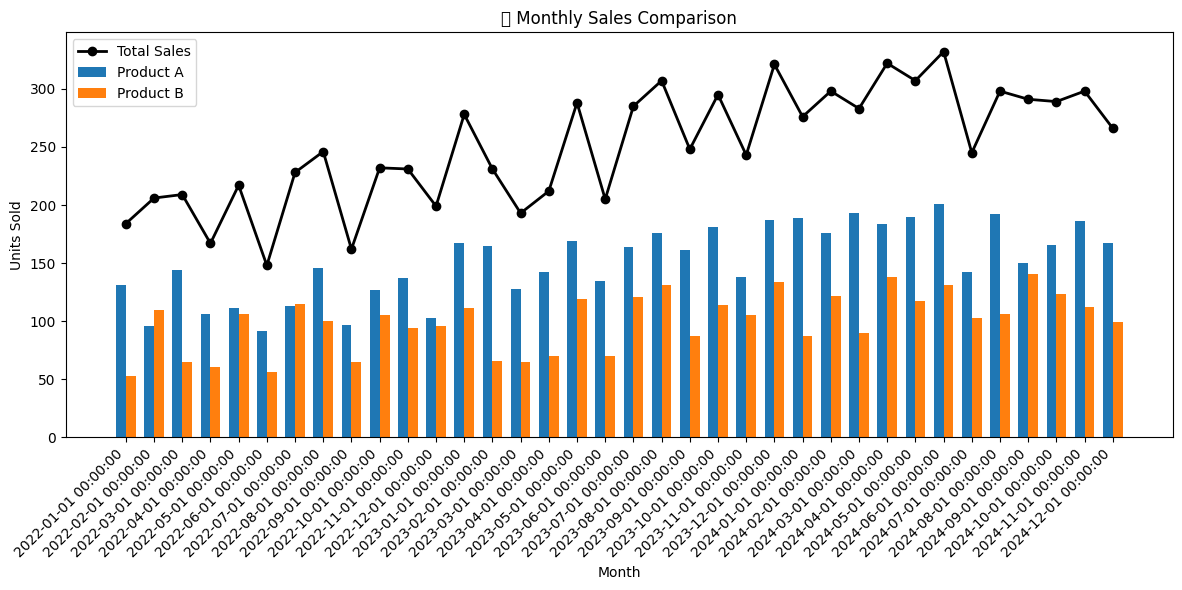

In [9]:
x = np.arange(len(df["Month"])) 
width = 0.35

plt.figure(figsize=(12,6))
plt.bar(x - width/2, df["Product_A_Sales"], width, label="Product A")
plt.bar(x + width/2, df["Product_B_Sales"], width, label="Product B")

plt.plot(x, df["Total Sales"], label="Total Sales", color="black", linewidth=2, marker="o")

plt.xticks(x, df["Month"], rotation=45, ha="right")
plt.legend()
plt.title("📊 Monthly Sales Comparison")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.tight_layout()
plt.show()


### v) Year-over-Year Growth(%)

C:\Users\IDA\AppData\Local\Temp\ipykernel_24776\3927283391.py:11: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


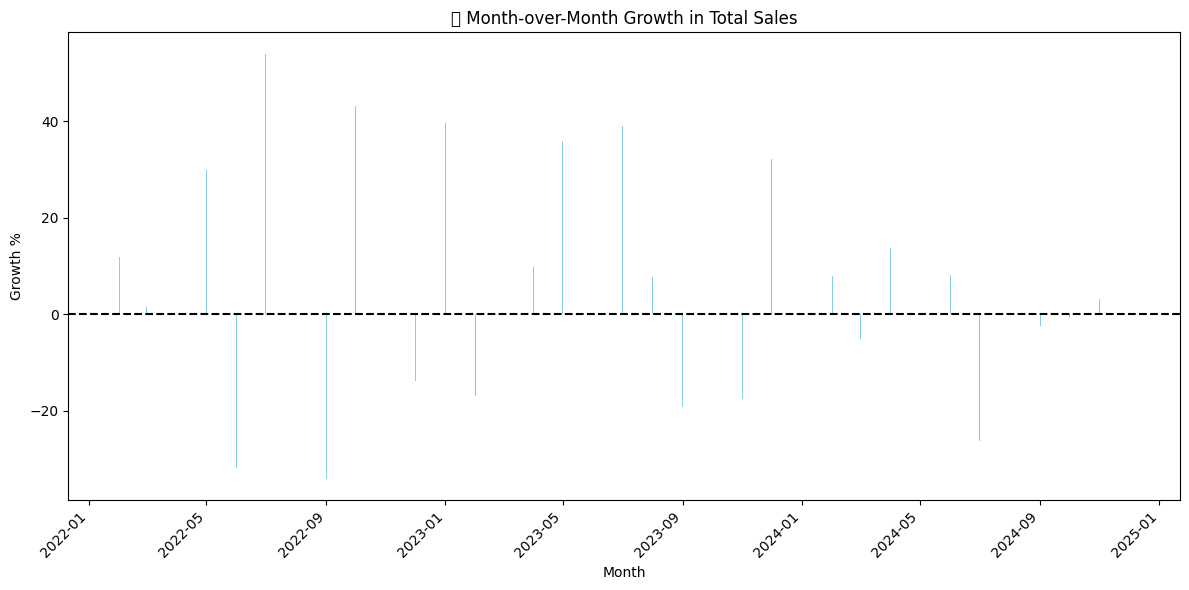

In [10]:
df["Growth %"] = df["Total Sales"].pct_change() * 100

plt.figure(figsize=(12,6))
plt.bar(df["Month"], df["Growth %"], color="skyblue")
plt.axhline(0, color="black", linestyle="--")

plt.title("📈 Month-over-Month Growth in Total Sales")
plt.xlabel("Month")
plt.ylabel("Growth %")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

### vi) Pie Chart for Total Contribution (All Months Combined)

This shows the overall share across the dataset:

C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 129383 (\N{PIE}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


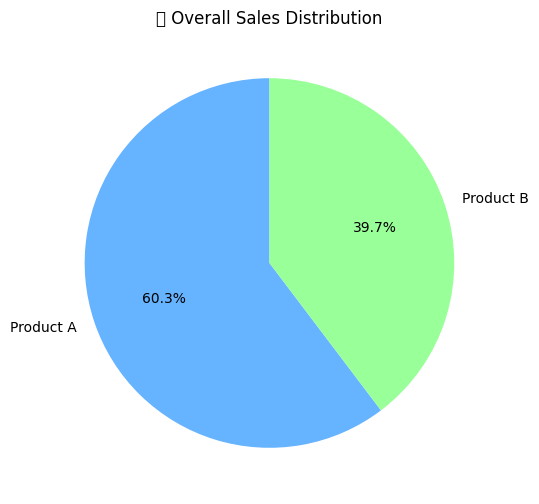

In [11]:
plt.figure(figsize=(6,6))

sales_totals = [df["Product_A_Sales"].sum(), df["Product_B_Sales"].sum()]
labels = ["Product A", "Product B"]

plt.pie(sales_totals, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#99ff99"])
plt.title("🥧 Overall Sales Distribution")
plt.show()


C:\Users\IDA\AppData\Local\Temp\ipykernel_24776\4258298972.py:16: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 127849 (\N{DOUGHNUT}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


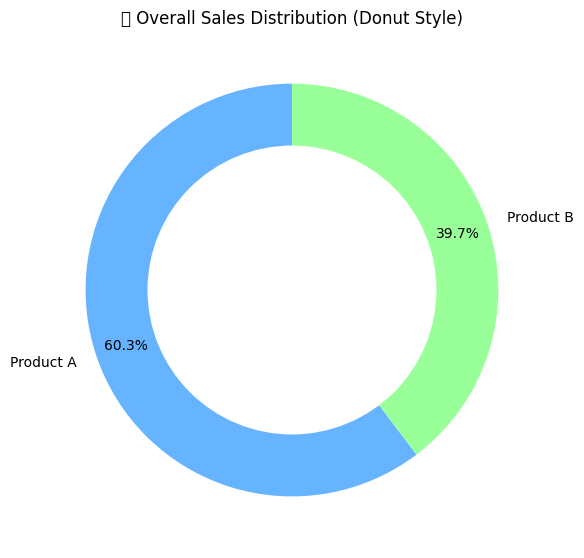

In [12]:
plt.figure(figsize=(6,6))

sales_totals = [df["Product_A_Sales"].sum(), df["Product_B_Sales"].sum()]
labels = ["Product A", "Product B"]

wedges, texts, autotexts = plt.pie(sales_totals, labels=labels, autopct="%1.1f%%",
                                   startangle=90, pctdistance=0.85,
                                   colors=["#66b3ff","#99ff99"])

# Draw center circle for donut look
centre_circle = plt.Circle((0,0),0.70,fc="white")
fig = plt.gcf()
fig.gca().add_artist(centre_circle)

plt.title("🍩 Overall Sales Distribution (Donut Style)")
plt.tight_layout()
plt.show()


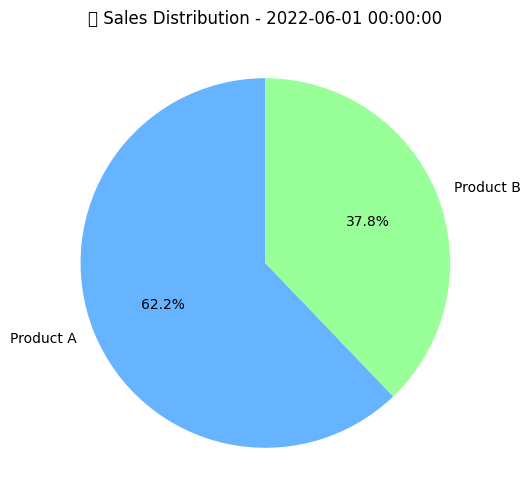

In [13]:
month_index = 5
sales = [df.loc[month_index, "Product_A_Sales"], df.loc[month_index, "Product_B_Sales"]]
labels = ["Product A", "Product B"]

plt.figure(figsize=(6,6))
plt.pie(sales, labels=labels, autopct="%1.1f%%", startangle=90, colors=["#66b3ff","#99ff99"])
plt.title(f"🥧 Sales Distribution - {df.loc[month_index, 'Month']}")
plt.show()


## 5. Descriptive Statisticts
Helps Quantify:
- Average monthly sales
- Variability (risk of stockouts or overproduction)
- Growth trends

**Business Insight**

Informs decisions on production & inventory

In [14]:
df.describe()

,Month,Product_A_Sales,Product_B_Sales,Total Sales,Growth %
count,36,36.000000,36.000000,36.000000,35.000000
mean,2023-06-16 18:40:00,151.444444,99.666667,251.111111,3.523008
min,2022-01-01 00:00:00,92.000000,53.000000,148.000000,-34.146341
25%,2022-09-23 12:00:00,130.250000,82.750000,211.250000,-15.234454
50%,2023-06-16 00:00:00,155.500000,105.000000,247.000000,1.456311
75%,2024-03-08 18:00:00,177.250000,117.500000,292.000000,16.366266
max,2024-12-01 00:00:00,201.000000,141.000000,332.000000,54.054054
std,NaN,31.779099,25.075885,49.586160,23.058349


## 6. Correlation Analysis
Do products move together?

**Business Insight**

- High correlation = products depend on similar demand drivers.
- Low correlation = divesify product lie to reduce risk.

C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128279 (\N{LINK SYMBOL}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


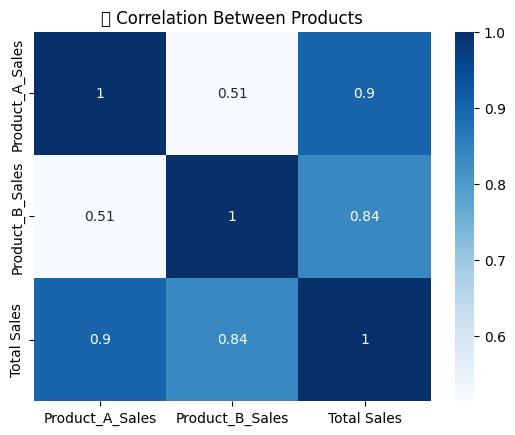

In [15]:
sns.heatmap(df[["Product_A_Sales", "Product_B_Sales", "Total Sales"]].corr(), annot=True, cmap="Blues")
plt.title("🔗 Correlation Between Products")
plt.show()


## 7. Forecasting future sales
We’ll use **Exponential Smoothing** (time-series model) to forecast 6 months ahead.

**Business Insight**

Forecasting helps management plan raw materials, labor, and distribution.


In [16]:
# Fit model
model = ExponentialSmoothing(df["Total Sales"], trend="add", seasonal=None).fit()

# Forecast next 6 months
forecast = model.forecast(6)
forecast_dates = pd.date_range(df["Month"].iloc[-1] + pd.offsets.MonthBegin(1), periods=6, freq="MS")

forecast_df = pd.DataFrame({"Month": forecast_dates, "Forecasted_Sales": forecast})
forecast_df


,Month,Forecasted_Sales
36,2025-01-01,317.282542
37,2025-02-01,320.859376
38,2025-03-01,324.436211
39,2025-04-01,328.013045
40,2025-05-01,331.589879
41,2025-06-01,335.166714


## 8. Visualize the Forecast
We’ll plot historical + forecast sales.

**Business Insight:**
  
Executives can see future demand and allocate resources accordingly.

C:\Users\IDA\AppData\Roaming\Python\Python312\site-packages\IPython\core\pylabtools.py:170: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


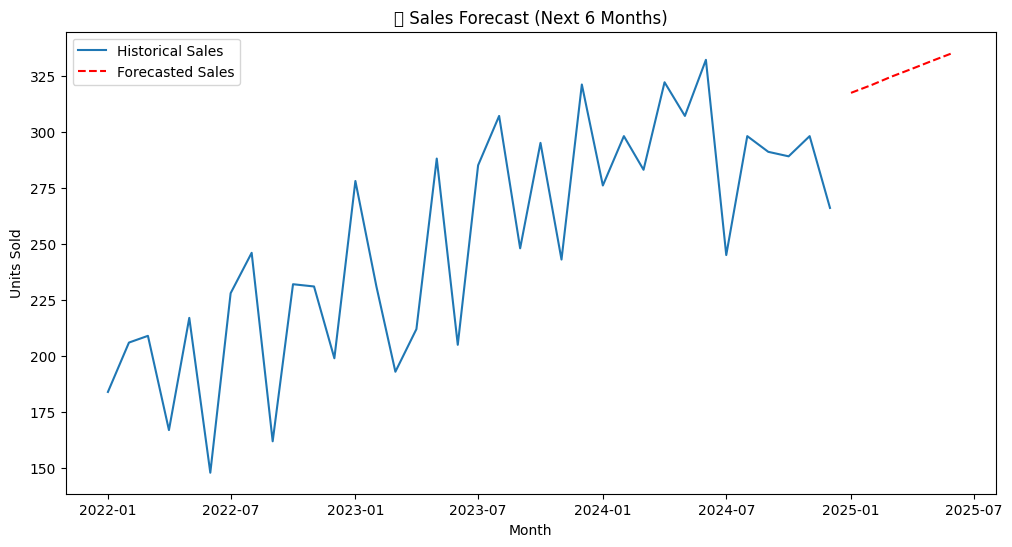

In [17]:
plt.figure(figsize=(12,6))
plt.plot(df["Month"], df["Total Sales"], label="Historical Sales")
plt.plot(forecast_df["Month"], forecast_df["Forecasted_Sales"], label="Forecasted Sales", linestyle="--", color="red")
plt.title("📊 Sales Forecast (Next 6 Months)")
plt.xlabel("Month")
plt.ylabel("Units Sold")
plt.legend()
plt.show()


## 9. Business Interpretation
- **Trend:** Sales are growing steadily with some fluctuations.  
- **Forecast:** Expected growth of ~5–10% over next 6 months.  
- **Impact:**  
   - Plan raw material procurement in advance  
   - Optimize staffing schedules  
   - Reduce risk of understocking (lost sales) or overstocking (waste)  
- **Value:** Data-driven planning ensures efficiency and cost savings.


In [18]:
df.to_csv("powerbi_feed.csv", index=False)
print("✅ Dataset generated and saved as powerbi_feed.csv")
print(df.head())

✅ Dataset generated and saved as powerbi_feed.csv
       Month  Product_A_Sales  Product_B_Sales  Total Sales   Growth %
0 2022-01-01              131               53          184        NaN
1 2022-02-01               96              110          206  11.956522
2 2022-03-01              144               65          209   1.456311
3 2022-04-01              106               61          167 -20.095694
4 2022-05-01              111              106          217  29.940120
